In [560]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pconst import const


In [561]:
sns.set(rc={'figure.figsize':(15, 4)})

pd.set_option('display.max_rows',5000)

In [562]:
df = pd.read_csv('/Users/thejakamahaulpatha/PycharmProjects/Project - Undervalued Stock/Data Set/AAPL.csv')

In [563]:
df.shape

(10202, 7)

In [564]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


In [565]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10197,2021-05-24,126.010002,127.940002,125.940002,127.099998,127.099998,63092900
10198,2021-05-25,127.820000,128.320007,126.320000,126.900002,126.900002,72009500
10199,2021-05-26,126.959999,127.389999,126.419998,126.849998,126.849998,56575900
10200,2021-05-27,126.440002,127.639999,125.080002,125.279999,125.279999,94625600
10201,2021-05-28,125.570000,125.800003,124.550003,124.610001,124.610001,71232700


In [566]:
df['Date'] = pd.to_datetime(df['Date'])

In [567]:
# df = df.set_index('Date')

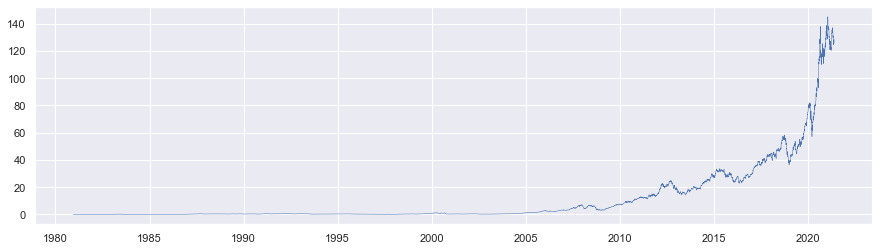

In [568]:
plt.plot(df['Date'],df['High'],linewidth=0.5)

In [569]:
#Get the year from a Date object
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [570]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600,1980


In [571]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Year                  int64
dtype: object

In [572]:
rows = df.count
df['Growth Rate'] = ""

for i in df.index:
    year = df['Year'][i]
    if year in range(2000,2011):
        if i!=0:
            df['Growth Rate'][i] = ((df['Close'][i])-(df['Close'][i-1]))/df['Close'][i-1]
# # #     print(i)

<ipython-input-572-ff3e6614d596>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Growth Rate'][i] = ((df['Close'][i])-(df['Close'][i-1]))/df['Close'][i-1]


In [573]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Growth Rate
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600,1980,
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800,1980,
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000,1980,
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600,1980,
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600,1980,


In [574]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Growth Rate
10197,2021-05-24,126.010002,127.940002,125.940002,127.099998,127.099998,63092900,2021,
10198,2021-05-25,127.820000,128.320007,126.320000,126.900002,126.900002,72009500,2021,
10199,2021-05-26,126.959999,127.389999,126.419998,126.849998,126.849998,56575900,2021,
10200,2021-05-27,126.440002,127.639999,125.080002,125.279999,125.279999,94625600,2021,
10201,2021-05-28,125.570000,125.800003,124.550003,124.610001,124.610001,71232700,2021,


In [575]:
sum_Of_Growth_Rates = (df.loc[df['Growth Rate'] != '', "Growth Rate"].sum())

sum_Of_Growth_Rates

3.9380854179265157

In [576]:
count_Of_Growth_Rates = df.loc[df['Growth Rate'] != '', "Growth Rate"].count()
average_GrowthRate_perDay = sum_Of_Growth_Rates /count_Of_Growth_Rates

average_GrowthRate_perDay

0.0014232328940825861

In [577]:
# Let's Calculate the growth rate in a different way

In [578]:
for i in df.index:
    year = df['Year'][i]
    if year in range(2000,2011):
        FirstRate = df['Close'][i]
        FirstYear = df['Year'][i]
        FirstIndex = i
        break
    
print(FirstRate,FirstYear)

0.999442 2000


In [579]:
for i in df.index:
    year = df['Year'][i]
    if year in range(2000,2011):
        LastRate = df['Close'][i]
        LastYear = df['Year'][i]
        LastDate = df['Date'][i]
        LastIndex = i
        
    
print("The Closing rate of the Last Date Chosen:",LastRate)
print("Year:                                    ",LastYear)
print("Last Date :                              ",LastDate)
print("Index of the Last Date:                  ",LastIndex)


The Closing rate of the Last Date Chosen: 11.52
Year:                                     2010
Last Date :                               2010-12-31 00:00:00
Index of the Last Date:                   7582


In [580]:
Average_GrowthRate = (LastRate-FirstRate)/FirstRate

Average_GrowthRate

10.526431748915893

In [581]:
# https://keisan.casio.com/exec/system/1232693402

In [582]:
Total_years = LastYear - FirstYear

Daily_Compound_Rate = 360*((LastRate/FirstRate)**(1/(Total_years*360))-1)

Daily_Compound_Rate

0.24454730376007205

##### Compound Annual Growth Rate

In [583]:
Compound_Annual_Growth_Rate = (LastRate/FirstRate)**(1/Total_years)-1
Compound_Annual_Growth_Rate

0.27693705062390483

##### Compound Daily Growth Rate

In [584]:
Compound_Daily_Growth_Rate = (LastRate/FirstRate)**(1/(LastIndex-FirstIndex))-1
Compound_Daily_Growth_Rate

0.0008842094866183814

### Let's Plot with the same compound rate for another 10 years  

In [585]:
# Initialize a column for the new prediction Values
df['NewPred'] =''

#Initialize a column for Safety Zone of 30%
df['Safety Zone'] = ''
safeZone = 0.7

In [586]:
LastDate

Timestamp('2010-12-31 00:00:00')

In [587]:
LastIndex

7582

In [588]:
LastRow = df['Date'].tolist().index(df['Date'][df.index[-1]])

df['NewPred'][LastIndex] = df['Close'][LastIndex]

for i in range(LastIndex+1,LastRow):
    df['NewPred'][i] = df['NewPred'][i-1]+((df['NewPred'][i-1])*Compound_Daily_Growth_Rate)
    df['Safety Zone'][i] = df['NewPred'][i]*safeZone

<ipython-input-588-a8654f4629f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewPred'][LastIndex] = df['Close'][LastIndex]
<ipython-input-588-a8654f4629f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewPred'][i] = df['NewPred'][i-1]+((df['NewPred'][i-1])*Compound_Daily_Growth_Rate)
<ipython-input-588-a8654f4629f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Safety Zone'][i] = df['NewPred'][i]*safeZone


In [589]:
df['NewPred'].tail

<bound method NDFrame.tail of 0                  
1                  
2                  
3                  
4                  
            ...    
10197    116.195118
10198    116.297858
10199     116.40069
10200    116.503613
10201              
Name: NewPred, Length: 10202, dtype: object>

In [590]:
df['Safety Zone'].tail()

10197    81.336582
10198    81.408501
10199    81.480483
10200    81.552529
10201             
Name: Safety Zone, dtype: object

In [591]:
#Let's Convert the Object Type to Float in order to plot it 

In [592]:
val = df['NewPred'][0]

for i in df.index :
    if df['NewPred'][i] == val:
        df['NewPred'][i] = 0.0
        df['Safety Zone'][i] = 0.0
        
    elif df['Safety Zone'][i] == val:
        df['Safety Zone'][i] = 0.0
        
    else:
        df['NewPred'][i].astype(float)
        df['Safety Zone'][i].astype(float)

<ipython-input-592-f4f4d2d6a994>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewPred'][i] = 0.0
<ipython-input-592-f4f4d2d6a994>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Safety Zone'][i] = 0.0
<ipython-input-592-f4f4d2d6a994>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Safety Zone'][i] = 0.0


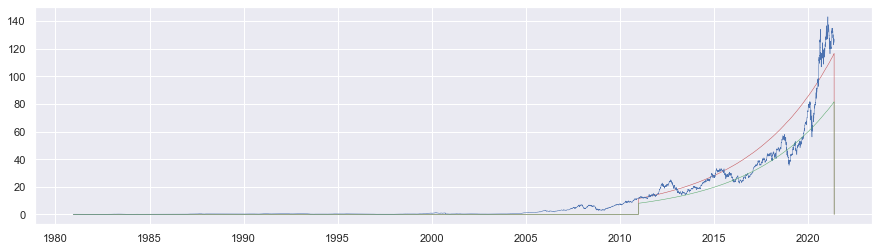

In [593]:
plt.plot(df['Date'],df['NewPred'],'r',linewidth=0.5)
plt.plot(df['Date'],df['Close'],linewidth=0.5)
plt.plot(df['Date'],df['Safety Zone'],'g',linewidth=0.5)